##### Copyright 2018 The TensorFlow Authors.

In [66]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [67]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

This block of code created to check if Google colab has the new version of Tensor Flow

In [68]:
try:
  %tensorflow_version 2.x
except Exception:
  pass


In [69]:
# This line of code used to write a Python 2/3 compatible codebase
from __future__ import absolute_import, division, print_function, unicode_literals

# Import TensorFlow library
import tensorflow as tf
# Import keras from TensorFlow library
from tensorflow import keras

# Import numpy and matplotlib.pyplot as helper libraries
import numpy as np
import matplotlib.pyplot as plt

# check the imported version of tensorflow
print(tf.__version__)

2.0.0


## Import the Fashion MNIST dataset

For our program we will use [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
60000 images from this dataset will be used to train our network and 10000 to check how our algorithm works 
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [70]:
# import fashion MNIST datset directly from tensorflow
fashion_mnist = keras.datasets.fashion_mnist

# load data from fashion_mnist dataset and split it on 4 arrays
#train_image and train_labels will be used as trainig set, test_images and test_labels as test set.
# they all arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images arrays are 28x28 NumPy arrays each element of it represent as pixl values from 0 to 255.
The labels arrays = arrays of integeres from 0 to 9 which represent the clothing class


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>



In [71]:
# just wanted to check how the images array looks like
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Each image is mapped to a single label. Class nams are not included with the dataset this why we are storing them in the class_names array to use later

In [72]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

We are need to check the format of the each set array that we will use to train and test our model. To do this we're using .shape property to get information about each of the array. The following shows there are 60,000 images in the training set, with each image represented with array of 28 x 28 pixels:

In [73]:
train_images.shape

(60000, 28, 28)

There are also 60000 labels in training set:

In [74]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [75]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

We are doing the same of the test set. There are 10 000 images in test set that represent as array of 28 x 28 pixels

In [76]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [77]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [78]:
# check the first image in train_images array
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

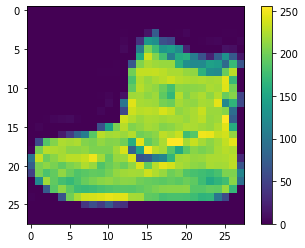

In [79]:
# The purpose of using plt.figure() is to create a figure object using matplotlib library
plt.figure()
# show image from the pixel values of the first element in train_images array
plt.imshow(train_images[0])
# display colorbar from the right of the figure, because 
plt.colorbar()
# don't show grid lines
plt.grid(False)
#I am not sure why do we need plt.show() here. It seems like everything works fien without it
plt.show()

We need to change our pixel data to be in range of 0 to 1. Todo this we need to  divide all the values by 255. 

In [64]:
train_images = train_images / 255.0

# We do the same for the training set and test set so thay can be processed the same way.
test_images = test_images / 255.0

To see that all data changed correctly we display first 25 images with labels under them

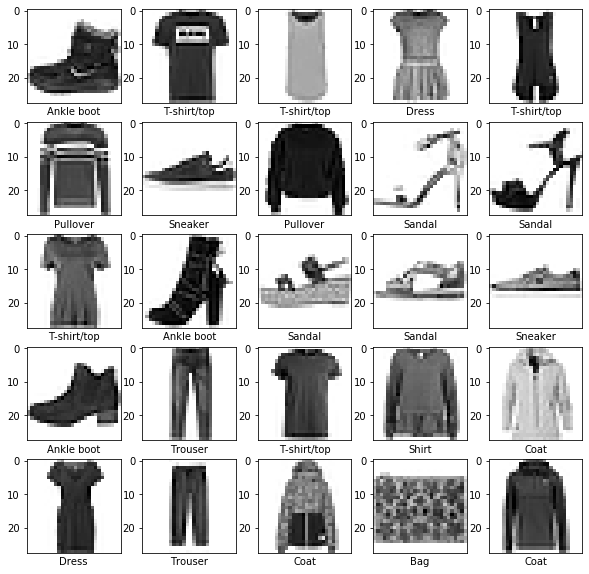

In [87]:
# create a figure that has size 10 x 10 inches
plt.figure(figsize=(10,10))

#create a for loop that wiil be repeated 25 times one time for each image that we want to draw
for i in range(25):
#pyplot.subplots creates a figure and a grid of subplots with a single call. Number of rows/columns of the subplot grid is 5. 
# The third parameter is index of the current subplot figure?

    plt.subplot(5,5,i+1)
    
#     Disable xticks (numbers on x-axis):
    plt.xticks([])
#    Disable yticks(numbers on y-axis):
    plt.yticks([])
#     don't display grid
    plt.grid(False)
    
#     Display image form the train_images array in the greyscale colors
    plt.imshow(train_images[i], cmap=plt.cm.binary)
#     display label of the image from the class names labels on the x-axis
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [88]:
# Build the Sequential model object(wich is a linear stack of layers) with the given layers

model = keras.Sequential([
#     we fltten the data. ieach emge is consists of an array of 28x28pixel consist after flattening it will become
#     a one-dimensional array with 784 pixels.
    keras.layers.Flatten(input_shape=(28, 28)),
#     define input and a hidden layer with 128 neurons and an activation relu function. 128 is dimensionality of the output space. Dense is 2D layer.
#     relu stands for Rectified Linear Unit. it returns tensor. relu fi=unction looks like this f(x) = max(0,x)
#     using different activations function doesn’t affect what our network can learn, only how fast (how many data/epochs it needs).
#     But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly.
#     That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph
#     but in our dataset we have only positive numbers so we can use relu
    keras.layers.Dense(128, activation='relu'),
#     build the output layer with softmax function  It normalizes our output in a non-linear fashion so that the sum of output for all classes is equals to 1
#     it consists of 10-neurons.Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
    keras.layers.Dense(10, activation='softmax')
])

### Compile the model



In [89]:
# Before start trainig our model we need to compile it first, by adding some new parameters we tell our neural network 
# how to start the training process.
# adam stands for Adam: Adaptive moment estimation. the adam has relatively low memory requirements 
model.compile(optimizer='adam',
#   we are targeting are integers, this is why use of sparse_categorical_crossentropy
#   this is the only thing that I found about this parameter that I can understand for now 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model


In [90]:
# we feed our trainig data(train_images and train_labels) to our model with "fit" method
# the model learns how to associate images with labels
# in each epochs(round) model accuracy improves. total we have 10 epochs
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 3.0746 - accuracy: 0.6955
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.6938 - accuracy: 0.7556
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5788 - accuracy: 0.8042
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5152 - accuracy: 0.8231
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4961 - accuracy: 0.8305
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4848 - accuracy: 0.8354
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4726 - accuracy: 0.8393
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4678 - accuracy: 0.8411s - loss: 0.4664 - accuracy: 
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4582 - ac

On the trainig data our model reaches accuracy about 88%

## Evaluate accuracy

After training process finished, we need to check how our model performs on the test dataset:

In [99]:
# Verbose is verbossity mode and I don't know what it means and why it is 2. in keras documentation it says it can be only 0 or 1 https://keras.io/models/model/
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
# print our test accuracy
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.3903 - accuracy: 0.8227

Test accuracy: 0.8227


Our model accuracy on test dataset is leess than on out trainig set.When machine learning moel performs worse on the new dataset than on training data It calls overfitting

## Make predictions

Now when our model trained we can use it to make predictions on some images

In [93]:
predictions = model.predict(test_images)

predictions is array of array which holds numbers that represent confidence level of the model about the label name for the current test element.

In [94]:
predictions[0]

array([7.1822265e-27, 2.8779539e-31, 0.0000000e+00, 8.4871533e-24,
       0.0000000e+00, 9.4860997e-03, 5.3216664e-33, 1.7427053e-02,
       1.6933843e-10, 9.7308683e-01], dtype=float32)

We checked the first element in predictions array.This is is an array of 10 numbers. The last label which represents ankle boot has the highest confidence level 9.7308683e-01

In [95]:
# return the indices of the maximum values along an axis
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:



In [96]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [97]:
# create function to create the image from the given array
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]

# get rid of tick and grid
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

# show image in grayscale
  plt.imshow(img, cmap=plt.cm.binary)

# if label was guessed right use blue color otherwise red
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

# function to create labe for the x-axis following the oattern
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# function to create value graph according to the data  
def plot_value_array(i, predictions_array, true_label):
    
  predictions_array, true_label = predictions_array, true_label[i]
# delete grid
  plt.grid(False)
# numbers on x-axis from 0 to 9
  plt.xticks(range(10))
# get rif of numbers on y-axis
  plt.yticks([])
# make the plotbar graph 
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
#     if prediced label is different than true label set color to red
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

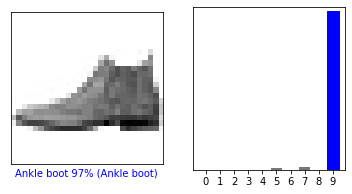

In [98]:
# first image from rredictions array
i = 0
# build the figure 6x3 inch size
plt.figure(figsize=(6,3))
# create subplot with image using plot image function
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
# create subplot with plotbar using plot_value_array function
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

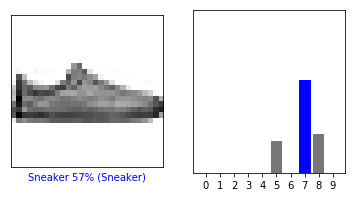

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

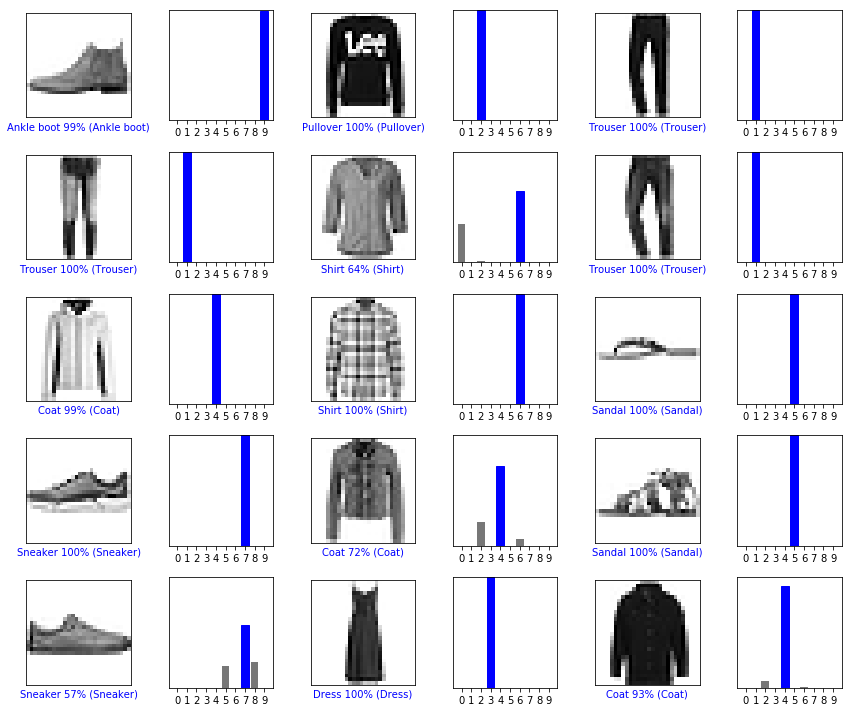

In [26]:
# Plot more images
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So w need to make our image to a list so we can check our model make predictions on it

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image using model.predict:

In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4175281e-04 8.5218921e-14 9.9798274e-01 1.7262291e-11 1.3707496e-03
  1.4081123e-14 5.0472573e-04 6.2876434e-17 3.6248435e-09 1.8519042e-13]]


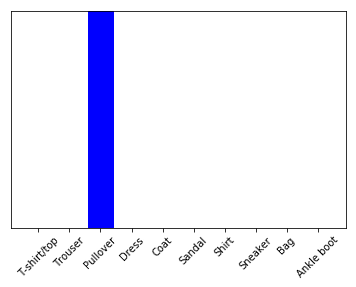

In [30]:
# and build a bar plot to display our data. the label tha moel was most confident about was pulover which is correct
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.